In [223]:
print(__doc__)

# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import  linear_model   #导入数据集和线性回归模型
from sklearn.metrics import mean_squared_error, r2_score #均方误差（损失函数） ，R2值（0-1 越大越好）

'''
#数据预处理
data=pd.read_csv("data.csv")
data=data.fillna(0)
count=0
map1,map2,map3={},{},{}
for i,r in data.iterrows():
    #print(i,'-->',r,type(r))
    key=data.iloc[len(data)-1-i,2]
    if key is not None  :
        if  key in map1 :
            map1[key]+=data.iloc[len(data)-1-i,3]
            map2[key]+=data.iloc[len(data)-1-i,4]
            map3[key]+=data.iloc[len(data)-1-i,5]
        else:
            map1[key]=0
            map2[key]=0
            map3[key]=0
            
            map1[key]+=data.iloc[len(data)-1-i,3] 
            map2[key]+=data.iloc[len(data)-1-i,4]
            map3[key]+=data.iloc[len(data)-1-i,5]

    data.iloc[len(data)-1-i,6]=map1[key]
    data.iloc[len(data)-1-i,7]=map2[key]
    data.iloc[len(data)-1-i,8]=map3[key]

data
data.to_csv('All.csv',encoding="utf_8_sig",index=0)

'''

Automatically created module for IPython interactive environment


'\n#数据预处理\ndata=pd.read_csv("data.csv")\ndata=data.fillna(0)\ncount=0\nmap1,map2,map3={},{},{}\nfor i,r in data.iterrows():\n    #print(i,\'-->\',r,type(r))\n    key=data.iloc[len(data)-1-i,2]\n    if key is not None  :\n        if  key in map1 :\n            map1[key]+=data.iloc[len(data)-1-i,3]\n            map2[key]+=data.iloc[len(data)-1-i,4]\n            map3[key]+=data.iloc[len(data)-1-i,5]\n        else:\n            map1[key]=0\n            map2[key]=0\n            map3[key]=0\n            \n            map1[key]+=data.iloc[len(data)-1-i,3] \n            map2[key]+=data.iloc[len(data)-1-i,4]\n            map3[key]+=data.iloc[len(data)-1-i,5]\n\n    data.iloc[len(data)-1-i,6]=map1[key]\n    data.iloc[len(data)-1-i,7]=map2[key]\n    data.iloc[len(data)-1-i,8]=map3[key]\n\ndata\ndata.to_csv(\'All.csv\',encoding="utf_8_sig",index=0)\n\n'

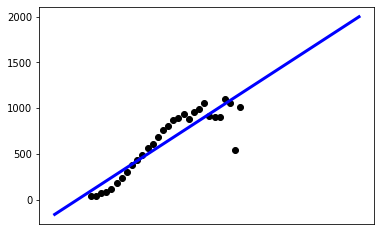

In [224]:
#累计确诊人数的线性回归预测模型
df=pd.read_csv("All.csv")
df['报道时间'] ='2020年'+df['报道时间'] 
df['报道时间'] = pd.to_datetime(df['报道时间'],format='%Y年%m月%d日')#字符串转时间类型
df
split_date = pd.datetime(2020,2,20)
predictX = pd.to_numeric(pd.date_range('1/15/2020 00:00', periods=60, freq='D').values).reshape(-1, 1)
df_train = df.loc[df['报道时间'] <= split_date]#筛选时间
data=df_train.drop_duplicates(subset=['报道时间','省份','城市'], keep='first')#去重复
data=data.where(df_train.省份=='湖南').groupby('报道时间',as_index=False).sum() 
trainX=pd.to_numeric(data['报道时间'].values).reshape(-1, 1)
trainY=data['累计确诊'].values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(trainX,trainY)
predictY=regr.predict(predictX)

plt.scatter(trainX, trainY,  color='black') #画测试集的散点图
plt.plot(predictX, predictY, color='blue', linewidth=3) #用预测的结果点集画线
plt.xticks(()) #隐藏xy轴坐标
plt.show() 
#data[data.报道时间  <= '2月20日']
#data[data.省份 == '湖北']

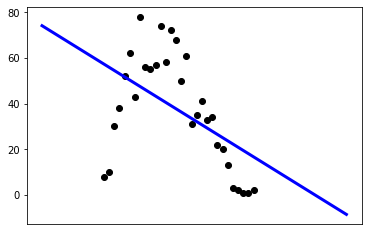

Timestamp('2020-03-09 00:00:00')

In [225]:
#3新增确诊人数的线性回归预测模型
df=pd.read_csv("All.csv")
df['报道时间'] ='2020年'+df['报道时间'] 
df['报道时间'] = pd.to_datetime(df['报道时间'],format='%Y年%m月%d日')#字符串转时间类型
df
split_date = pd.datetime(2020,2,20)
predictX = pd.to_numeric(pd.date_range('1/10/2020 00:00', periods=60, freq='D').values).reshape(-1, 1)
df_train = df.loc[df['报道时间'] <= split_date]#筛选时间
data=df_train.where(df_train.省份=='湖南').groupby('报道时间',as_index=False).sum() 
trainX=pd.to_numeric(data['报道时间'].values).reshape(-1, 1)
trainY=data['新增确诊'].values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(trainX,trainY)
predictY=regr.predict(predictX)


plt.scatter(trainX, trainY,  color='black') #画测试集的散点图
plt.plot(predictX, predictY, color='blue', linewidth=3) #用预测的结果点集画线
plt.xticks(()) #隐藏xy轴坐标
plt.show() 

count = 0
lastCount=0
for i in np.nditer(predictY):
    if i <= 0:
        lastCount=count
    count+=1
pd.to_datetime(np.polyval(predictX[lastCount],0))

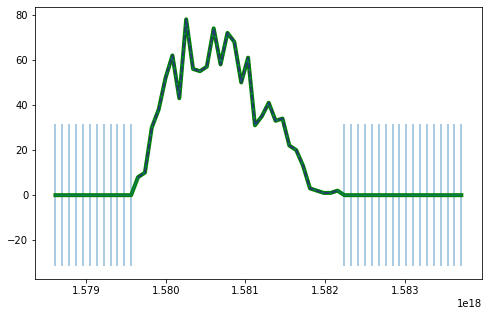

Timestamp('2020-01-21 00:00:00')

In [226]:
#4新增确诊人数的线性回归预测模型
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern,DotProduct,ConstantKernel, WhiteKernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

df=pd.read_csv("All.csv")
df['报道时间'] ='2020年'+df['报道时间'] 
df['报道时间'] = pd.to_datetime(df['报道时间'],format='%Y年%m月%d日')#字符串转时间类型
df
split_date = pd.datetime(2020,2,20)
predictX = pd.to_numeric(pd.date_range('1/10/2020 00:00', periods=60, freq='D').values).reshape(-1, 1)
df_train = df.loc[df['报道时间'] <= split_date]#筛选时间
data=df_train.where(df_train.省份=='湖南').groupby('报道时间',as_index=False).sum() 
trainX=pd.to_numeric(data['报道时间'].values).reshape(-1, 1)
trainY=data['新增确诊'].values.reshape(-1, 1)

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (0.5, 2))
#kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)
#kernel=0.00316**2 + Matern(length_scale=1.11, nu=1.5) + WhiteKernel(noise_level=0.0912)

gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(trainX, trainY)
gpr.score(trainX, trainY)
means, sigmas=gpr.predict(predictX, return_std=True)

plt.figure(figsize=(8, 5))
plt.errorbar(predictX, means, yerr=sigmas, alpha=0.5)
plt.plot(predictX, means, 'g', linewidth=4)
 
colors = ['g', 'r', 'b', 'k']
for c in colors:
    y_set = gpr.sample_y(trainX, random_state=np.random.randint(1000))
    plt.plot(trainX.reshape(-1,1), y_set.reshape(-1,1), c + '--', alpha=0.5)


plt.show()

count = 0
lastCount=0
for i in np.nditer(means):
    if i <= 0 and count>10:
        lastCount=count
        break
    count+=1
pd.to_datetime(np.polyval(predictX[lastCount],0))


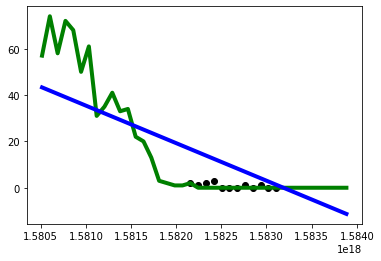

In [227]:
#（5）用2月21日至3月2日的真实数据，比较（3）和（4），将两个回归算法的拟合曲线画在同一个图表中
split_date = pd.datetime(2020,2,20)
split_date_end = pd.datetime(2020,3,2)
df_train = df.loc[(df['报道时间'] >=split_date)  & (df['报道时间'] <= split_date_end)]#筛选时间
data=df_train.where(df_train.省份=='湖南').groupby('报道时间',as_index=False).sum() 
trainX=pd.to_numeric(data['报道时间'].values).reshape(-1, 1)
trainY=data['新增确诊'].values.reshape(-1, 1)

predictX = pd.to_numeric(pd.date_range('2/1/2020 00:00', periods=40, freq='D').values).reshape(-1, 1)

means, sigmas=gpr.predict(predictX, return_std=True)
predictY=regr.predict(predictX)



plt.plot(predictX, means, 'g', linewidth=4)
plt.plot(predictX, predictY, color='blue', linewidth=4)
plt.scatter(trainX, trainY,  color='black')
plt.show()

In [228]:
from sklearn.metrics import mean_squared_error
means, sigmas=gpr.predict(trainX, return_std=True)
predictY=regr.predict(trainX)
print(mean_squared_error(trainY, predictY))
print(mean_squared_error(trainY, means))

85.256197620782
1.3333333333333333


In [229]:
print(r2_score(trainY, predictY))
print(r2_score(trainY, means))

-86.69208898137578
-0.37142857142857144


In [230]:
trainY

means

array([[2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])